In [1]:
#IMPORTAR LIBRERÍAS A UTILIZAR PARA EL ANÁLISIS EXPLORATORIO DE DATOS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string, ast

In [2]:
#IMPORTAR DATAFRAME QUE SURGIÓ DE LA LIMPIEZA DE DATOS
df2 = pd.read_csv('df_ETL.csv', sep=',', encoding="utf8")

In [3]:
#IMPRIMO PARTE DEL DATAFRAME PARA CORROBORAR QUE SE CARGÓ CORRECTAMENTE 
df2.head(5)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,release_year,return
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,...,['English'],Released,NaN,Toy Story,7.7,5415.0,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",['John Lasseter'],1995,12.451801
1,NaN,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,...,"['English', 'Français']",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",['Joe Johnston'],1995,4.043035
2,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],1995-12-22,...,['English'],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",['Howard Deutch'],1995,0.000000
3,NaN,16000000.0,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],1995-12-22,...,['English'],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"['Whitney Houston', 'Angela Bassett', 'Loretta...",['Forest Whitaker'],1995,5.090760
4,Father of the Bride Collection,0.0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],1995-02-10,...,['English'],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"['Steve Martin', 'Diane Keaton', 'Martin Short...",['Charles Shyer'],1995,0.000000


In [4]:
#VISTA GENERAL AL DATAFRAME
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4497 non-null   object 
 1   budget                 45451 non-null  float64
 2   genres                 45451 non-null  object 
 3   id                     45451 non-null  int64  
 4   original_language      45440 non-null  object 
 5   overview               44510 non-null  object 
 6   popularity             45451 non-null  float64
 7   production_companies   45451 non-null  object 
 8   production_countries   45451 non-null  object 
 9   release_date           45451 non-null  object 
 10  revenue                45451 non-null  float64
 11  runtime                45205 non-null  float64
 12  spoken_languages       45451 non-null  object 
 13  status                 45371 non-null  object 
 14  tagline                20425 non-null  object 
 15  ti

In [5]:
#REVISANDO VALORES NULOS
df2.isnull().sum()

belongs_to_collection    40954
budget                       0
genres                       0
id                           0
original_language           11
overview                   941
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                    246
spoken_languages             0
status                      80
tagline                  25026
title                        0
vote_average                 0
vote_count                   0
cast                         0
crew                         0
release_year                 0
return                       0
dtype: int64

"""ANÁLISIS DE CADA COLUMNA A SIMPLE VISTA, PARA DETERMINAR CUÁL INFORMACIÓN NO ES NECESARIA PARA
EL DESARROLLO DEL MODELO Y COMENZAR A HACER MÁS SENCILLO EL DATAFRAME Y ANALIZAR A DETALLE LAS 
COLUMNAS QUE QUEDEN"""

#BELONGS_TO_COLLECTION - A pesar de tener muchos datos "faltantes", se considera importante mantenerla para el modelo, ya que, si alguien ve una película que pertence a una serie de películas, querrá ver las otras.

#BUDGET - Parece interesante para el modelo, sin embargo, cuenta con un porcentaje de valores en 0 que se traducen cómo desconocidos, no se puede trabajar con una cantidad tan baja, puede influir en el resultado (Código en la siguiente línea)

#GENRES - Una columna que considero importante para realizar un modelo de recomendación

#ID - No tiene información relevante para el modelo

#ORIGINAL_LANGUAGE - Esta columna no es importante considerando que la columna spoken_languajes ya contiene esta información y datos más relevantes cómo si está doblada en otros idiomas

#OVERVIEW -Puede servir para el modelo de recomendación, se decidirá más adelante

#POPULARITY - Por el momento se mantiene, a las personas les gusta ver películas de acuerdo a su popularidad

#PRODUCTION_COMPANIES - Por el momento se queda, generalmente si te gusta una película de una productora, querras ver más de esa compañía

#PRODUCTION_COUNTRIES - Considero importante este dato, habrá que ver su correlación con la columna original_languaje, más adelante

#RELEASE_DATE - No se considera relevante para el modelo, con el año es suficiente

#REVENUE - Mismo caso que budget, esta columna se va (código más abajo)

#RUNTIME - Por el momento se queda, se necesita analizarla más a detalle

#SPOKEN_LANGUAGES - Esta columna parece necesaria mantenerla, ya que a las personas muchas veces les gusta que la película esté doblada en un idioma en particular

#STATUS - No parece relevante, pero se debe analizar, ya que pueden haber películas canceladas que no tiene caso recomendar, sirve para hacer una depuración de películas más adelante

#TAGLINE - Las frases célebres no parece relevante y no servirá para hacer un cluster, además tiene más del 55% de datos vacíos (CÓDIGO de donde se obtuvo el recultado MÁS ADELANTE)

#TITLE - La columna más importante para poder realizar el modelo, ya que corresponde a la respuesta

#VOTE_AVERAGE - Columna importante ya que contiene la votación del público, habrá que revisar valores atípicos

#VOTE_COUNT - No parece una columna relevante, sin embargo, conviene revisarla junto con la columna vote_average, para detectar valores atípicos y confirmar si dicha columna servirá para el modelo

#CAST - Columna importante para el modelo, quien no tiene inclinación por algún actor en particular?

#CREW - Cambiar el nombre de esta fila ya que sólo contiene el dato del director. columna importante para el modelo

#RELEASE_YEAR - Se considera que la columna es importante para el clustering

#RETURN - Esta columna se forma con las columnas de budget y revenue, las cuales carecen de datos, lo que las hace deficientes para un buen modelamiento, incluyendo esta.

In [6]:
#OBTENCIÓN DE PORCENTAJE DE NULOS PARA BUDGET
porcentaje_ceros = ((df2[df2['budget']==0].shape[0])/df2.shape[0]) * 100
print(f'Porcentaje de datos desconocidos para la columna budget: {porcentaje_ceros:.2F}%')

Porcentaje de datos desconocidos para la columna budget: 80.40%


In [7]:
#OBTENCIÓN DE PORCENTAJE DE NULOS PARA REVENUE
porcentaje_ceros = ((df2[df2['revenue']==0].shape[0])/df2.shape[0]) * 100
print(f'Porcentaje de datos desconocidos para la columna revenue: {porcentaje_ceros:.2F}%')

Porcentaje de datos desconocidos para la columna revenue: 83.66%


In [8]:
#OBTENCIÓN DE PORCENTAJE DE NULOS PARA TAGLINE
porcentaje_ceros = ((df2.tagline.isnull().sum())/df2.shape[0]) * 100
print(f'Porcentaje de datos vacíos para la columna tagline: {porcentaje_ceros:.2F}%')

Porcentaje de datos vacíos para la columna tagline: 55.06%


"""Después de dicho análisis, procedo a eliminar las columnas: budget, id, original_language,
release_date, revenue, tagline y return"""

In [9]:
#ELIMINANDO COLUMNAS PARA PROCEDER A UN ANÁLISIS MÁS PROFUNDO, PERO ANTES REALIZO UNA COPIA DE SEGURIDAD
df3 = df2.copy()
df3.drop(['budget', 'id', 'original_language', 'release_date', 'revenue', 'tagline', 'return'], axis=1, inplace=True)

In [10]:
#VISUALIZAMOS CÓMO QUEDÓ EL DATAFRAME
df3.head(5)

,belongs_to_collection,genres,overview,popularity,production_companies,production_countries,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew,release_year
0,Toy Story Collection,"['Animation', 'Comedy', 'Family']","Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],81.0,['English'],Released,Toy Story,7.7,5415.0,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",['John Lasseter'],1995
1,NaN,"['Adventure', 'Fantasy', 'Family']",When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],104.0,"['English', 'Français']",Released,Jumanji,6.9,2413.0,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",['Joe Johnston'],1995
2,Grumpy Old Men Collection,"['Romance', 'Comedy']",A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],101.0,['English'],Released,Grumpier Old Men,6.5,92.0,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",['Howard Deutch'],1995
3,NaN,"['Comedy', 'Drama', 'Romance']","Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],127.0,['English'],Released,Waiting to Exhale,6.1,34.0,"['Whitney Houston', 'Angela Bassett', 'Loretta...",['Forest Whitaker'],1995
4,Father of the Bride Collection,['Comedy'],Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],106.0,['English'],Released,Father of the Bride Part II,5.7,173.0,"['Steve Martin', 'Diane Keaton', 'Martin Short...",['Charles Shyer'],1995


Comienza la búsqueda de outliers y anomalías para las columnas de runtime, status, vote_average y
vote_count

In [11]:
#STATUS ES UNA COLUMNA A ELIMINAR YA QUE OBVIAMENTE RECOMENDARÁS PELÍCULAS QUE YA FUERON ESTRENADAS
#POR LO QUE PROCEDO A ELIMINAR TODAS LAS FILAS QUE NO DICEN RELEASED
df3.status.value_counts()


Released           45009
Rumored              232
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: status, dtype: int64

In [12]:
df3.shape

(45451, 15)

In [13]:
df_released = df3[df3['status'] == 'Released']
df_released.shape

(45009, 15)

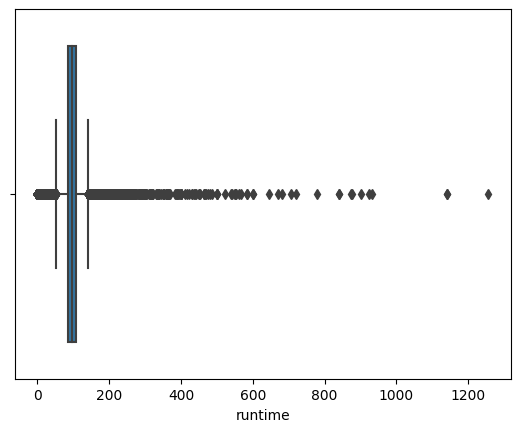

In [14]:
#REVISÓN DE LA COLUMNA RUNTIME, EFECTIVAMENTE HAY OUTLIERS, TANTO QUE LA GRÁFICA NO SE VE CLARO
#SACARÉ EL TOTAL DE OUTLIERS, PARA 0 ES UN ERROR, YA QUE NO PUEDE HABER PELÍCULAS CON 0 EN TIEMPO
#DE DURACIÓN, Y DEL LÍMITE SUPERIOR, NO NECESARIAMENTE SON PELÍCULAS, LA MAYORÍA SON SERIES Y 
#DOCUMENTALES, LOS ELIMINARÉ PARA EFECTOS DEL MODELO
sns.boxplot(x = 'runtime', data = df_released)
plt.show()

In [15]:
#Checando rangos intercuartílicos, para obtener los outliers (me interesan los del límite superior)
q1 = df_released['runtime'].quantile(0.25)
q3 = df_released['runtime'].quantile(0.75)
iqr = q3 - q1
bInf = q1 - 1.5*iqr
bSup = q3 + 1.5*iqr

print(f'Q1={q1}, Q3={q3}, IQR={iqr}, BINF={bInf}, BSUP={bSup}')

Q1=85.0, Q3=107.0, IQR=22.0, BINF=52.0, BSUP=140.0


In [16]:
#Se tomaron cómo series a los outliers fuera del límite del rango superior
df_released['outlier_runtime'] = np.where(df_released['runtime']>=bSup, '0', '1')
df_released.head(5)

C:\Users\nanci\AppData\Local\Temp\ipykernel_11084\503344560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_released['outlier_runtime'] = np.where(df_released['runtime']>=bSup, '0', '1')


,belongs_to_collection,genres,overview,popularity,production_companies,production_countries,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew,release_year,outlier_runtime
0,Toy Story Collection,"['Animation', 'Comedy', 'Family']","Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],81.0,['English'],Released,Toy Story,7.7,5415.0,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",['John Lasseter'],1995,1
1,NaN,"['Adventure', 'Fantasy', 'Family']",When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],104.0,"['English', 'Français']",Released,Jumanji,6.9,2413.0,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",['Joe Johnston'],1995,1
2,Grumpy Old Men Collection,"['Romance', 'Comedy']",A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],101.0,['English'],Released,Grumpier Old Men,6.5,92.0,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",['Howard Deutch'],1995,1
3,NaN,"['Comedy', 'Drama', 'Romance']","Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],127.0,['English'],Released,Waiting to Exhale,6.1,34.0,"['Whitney Houston', 'Angela Bassett', 'Loretta...",['Forest Whitaker'],1995,1
4,Father of the Bride Collection,['Comedy'],Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],106.0,['English'],Released,Father of the Bride Part II,5.7,173.0,"['Steve Martin', 'Diane Keaton', 'Martin Short...",['Charles Shyer'],1995,1


In [17]:
df_released.outlier_runtime.value_counts()

1    42930
0     2079
Name: outlier_runtime, dtype: int64

In [18]:
df_runtime = df_released.drop(df_released[df_released['outlier_runtime']=='0'].index)
df_runtime.shape

(42930, 16)

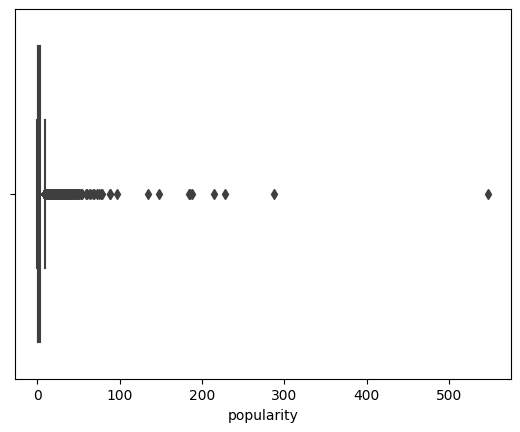

In [19]:
#REVISÓN DE LA COLUMNA POPULARITY, PARA EFECTOS DEL MODELO, SE QUIERE RECOMENDAR UNA PELÍCULA
#QUE SEA FAMOSA, SOBRE UNA DESCONOCIDA, SE ANALIZARÁ MEJOR DICHOS RESULTADOS PARA TOMAR UNA DECISIÓN
sns.boxplot(x = 'popularity', data = df_runtime)
plt.show()

In [20]:
#Checando rangos intercuartílicos, para obtener los outliers (me interesan los del límite superior)
q1 = df_runtime['popularity'].quantile(0.25)
q3 = df_runtime['popularity'].quantile(0.75)
iqr = q3 - q1
bInf = q1 - 1.5*iqr
bSup = q3 + 1.5*iqr

print(f'Q1={q1}, Q3={q3}, IQR={iqr}, BINF={bInf}, BSUP={bSup}')

Q1=0.38739225, Q3=3.702294, IQR=3.31490175, BINF=-4.584960375, BSUP=8.674646625000001


In [21]:
df_runtime['popularity'].describe()

count    42930.000000
mean         2.877821
std          5.589930
min          0.000000
25%          0.387392
50%          1.131324
75%          3.702294
max        547.488298
Name: popularity, dtype: float64

In [22]:
#OBTENCIÓN DE PORCENTAJE DE NULOS PARA POPULARITY, LOS NULOS SON MUY BAJOS ASÍ QUE SE PUEDE
#APLICAR UN FILTRO PARA ESTA COLUMNA
porcentaje_ceros = ((df_runtime[df_runtime['popularity']==0].shape[0])/df_runtime.shape[0]) * 100
print(f'Porcentaje de datos en ceros para la columna popularity: {porcentaje_ceros:.2F}%')

Porcentaje de datos en ceros para la columna popularity: 0.09%


In [23]:
#SE TOMA LA DECISIÓN DE ELIMINAR TODOS LAS PELÍCULAS QUE ESTÁN INFERIOR A Q1, YA QUE NO SON
#INDISPENSABLES PARA ENTRENAR EL MODELO
df_popularity = df_released.drop(df_runtime[df_runtime['popularity']<q1].index)
df_popularity.shape


(34276, 16)

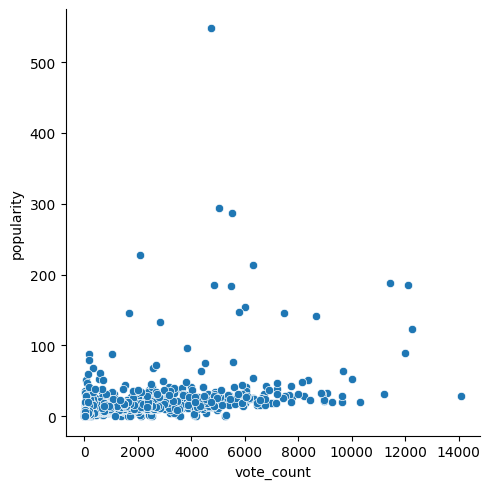

In [24]:
#A CONTINUACIÓN SE EXAMINA LA COLUMNA VOTE_COUNT y POPULARITY, Y VER SI ESTÁN CORRELACIONADAS, 
#SE OBSERVA HAY UNA RELACIÓN A MENOR POPULARIDAD, MENOS VOTOS POR LOS ESPECTADORES

sns.relplot(x='vote_count', y='popularity', data=df_popularity)

In [25]:
df_popularity['popularity'].describe()

count    34276.000000
mean         3.821004
std          6.665650
min          0.000000
25%          0.879719
50%          1.840682
75%          5.354953
max        547.488298
Name: popularity, dtype: float64

In [26]:
df_popularity['vote_count'].describe()

count    34276.000000
mean       144.873673
std        561.373503
min          0.000000
25%          7.000000
50%         17.000000
75%         55.000000
max      14075.000000
Name: vote_count, dtype: float64

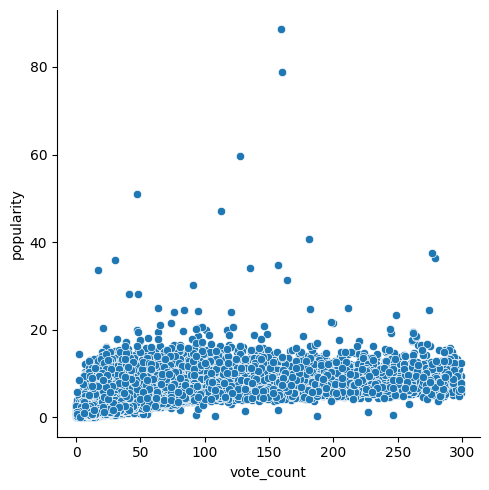

In [43]:
#ANALIZEMOS UN POCO MÁS DE CERCA,la correlación es evidente, a menor voto, menor popularidad, 
#así que se procede a la eliminación de esos datos, para mejorar el modelo de recomendación
mask4 = df_popularity[df_popularity['vote_count']<300]
sns.relplot(x='vote_count', y='popularity', data=mask4)

In [44]:
mask4.shape

(31240, 16)

In [45]:
#Checando rangos intercuartílicos, para obtener los outliers (me interesan los del límite superior)
q1 = df_popularity['vote_count'].quantile(0.25)
q3 = df_popularity['vote_count'].quantile(0.75)
iqr = q3 - q1
bInf = q1 - 1.5*iqr
bSup = q3 + 1.5*iqr

print(f'Q1={q1}, Q3={q3}, IQR={iqr}, BINF={bInf}, BSUP={bSup}')

Q1=7.0, Q3=55.0, IQR=48.0, BINF=-65.0, BSUP=127.0


In [46]:
df_vote = df_popularity.drop(df_popularity[df_popularity['vote_count']<300].index)
df_vote.shape

(3036, 16)

Eliminación de las columnas analizadas, ya que no aportan al modelado que se realizará más adelante

In [47]:
df_filt = df_vote.drop(['status', 'runtime', 'vote_count', 'vote_average'], axis=1)
df_filt

,belongs_to_collection,genres,overview,popularity,production_companies,production_countries,spoken_languages,title,cast,crew,release_year,outlier_runtime
0,Toy Story Collection,"['Animation', 'Comedy', 'Family']","Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],['English'],Toy Story,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",['John Lasseter'],1995,1
1,NaN,"['Adventure', 'Fantasy', 'Family']",When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],"['English', 'Français']",Jumanji,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",['Joe Johnston'],1995,1
5,NaN,"['Action', 'Crime', 'Drama', 'Thriller']","Obsessive master thief, Neil McCauley leads a ...",17.924927,"['Regency Enterprises', 'Forward Pass', 'Warne...",['United States of America'],"['English', 'Español']",Heat,"['Al Pacino', 'Robert De Niro', 'Val Kilmer', ...",['Michael Mann'],1995,0
9,James Bond Collection,"['Adventure', 'Action', 'Thriller']",James Bond must unmask the mysterious head of ...,14.686036,"['United Artists', 'Eon Productions']","['United Kingdom', 'United States of America']","['English', 'Pусский', 'Español']",GoldenEye,"['Pierce Brosnan', 'Sean Bean', 'Izabella Scor...",['Martin Campbell'],1995,1
12,Balto Collection,"['Family', 'Animation', 'Adventure']",An outcast half-wolf risks his life to prevent...,12.140733,"['Universal Pictures', 'Amblin Entertainment',...",['United States of America'],['English'],Balto,"['Kevin Bacon', 'Bob Hoskins', 'Bridget Fonda'...",['Simon Wells'],1995,1
...,...,...,...,...,...,...,...,...,...,...,...,...
44942,NaN,['Comedy'],Three friends leave Milan by car heading south...,5.149498,['Rodeo Drive'],['Italy'],['Italiano'],Three Men and a Leg,"['Aldo Baglio', 'Giovanni Storti', 'Giacomo Po...","['Massimo Venier', 'Aldo Baglio', 'Giovanni St...",1997,1
45006,NaN,"['Action', 'Western', 'Science Fiction', 'Fant...","The last Gunslinger, Roland Deschain, has been...",50.903593,"['Imagine Entertainment', 'Weed Road Pictures'...","['South Africa', 'United States of America']",['English'],The Dark Tower,"['Idris Elba', 'Matthew McConaughey', 'Tom Tay...",['Nikolaj Arcel'],2017,1
45130,NaN,"['Comedy', 'Family', 'Animation']","Gene, a multi-expressional emoji, sets out on ...",33.694599,"['Columbia Pictures', 'Sony Pictures Animation']",['United States of America'],['English'],The Emoji Movie,"['T.J. Miller', 'James Corden', 'Anna Faris', ...",['Anthony Leondis'],2017,1
45164,NaN,"['Drama', 'Crime', 'Thriller']",A newly-released prison gangster is forced by ...,15.786854,"['Bold Films', 'Participant Media', 'Relativit...",['United States of America'],['English'],Shot Caller,"['Nikolaj Coster-Waldau', 'Jon Bernthal', 'Lak...",['Ric Roman Waugh'],2017,1


Es momento de eliminar duplicados de películas, hay unas películas que tienen mismo nombre pero diferente producción, sin embargo, para el objetivo del modelo de recomendación, es irrelevante, ya que sólo nos retornará el nombre de la película sin informackión adicional, tomando en consideración esto, primero se ordenará por año en orden descendente y se eliminarán duplicados.

In [48]:

by_year = df_filt.sort_values('release_year', ascending=False)
by_year.shape


(3036, 12)

In [49]:
by_year.drop(by_year[(by_year['title'].duplicated())].index, inplace=True)
by_year.shape

(2994, 12)

In [50]:
#SE ELIMINAN SIGNOS DE PUNTUACIÓN A LAS VARIABLES CON TEXTO 
by_year['genres'] = by_year['genres'].str.replace('[{}]'.format(string.punctuation), '')
by_year['overview'] = by_year['overview'].str.replace('[{}]'.format(string.punctuation), '')
by_year['production_companies'] = by_year['production_companies'].str.replace('[{}]'.format(string.punctuation), '')
by_year['spoken_languages'] = by_year['spoken_languages'].str.replace('[{}]'.format(string.punctuation), '')
by_year['crew'] = by_year['crew'].str.replace('[{}]'.format(string.punctuation), '')
by_year['cast'] = by_year['cast'].str.replace('[{}]'.format(string.punctuation), '')
by_year['production_countries'] = by_year['production_countries'].str.replace('[{}]'.format(string.punctuation), '')

C:\Users\nanci\AppData\Local\Temp\ipykernel_11084\1099830451.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  by_year['genres'] = by_year['genres'].str.replace('[{}]'.format(string.punctuation), '')
C:\Users\nanci\AppData\Local\Temp\ipykernel_11084\1099830451.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  by_year['overview'] = by_year['overview'].str.replace('[{}]'.format(string.punctuation), '')
C:\Users\nanci\AppData\Local\Temp\ipykernel_11084\1099830451.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  by_year['production_companies'] = by_year['production_companies'].str.replace('[{}]'.format(string.punctuation), '')
C:\Users\nanci\AppData\Local\Temp\ipykernel_11084\1099830451.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  by_year['spoken_languages'] = by_year['spoken_lan

In [51]:
#VISUALIZACIÓN DEL DATAFRAME
by_year.head(5)

,belongs_to_collection,genres,overview,popularity,production_companies,production_countries,spoken_languages,title,cast,crew,release_year,outlier_runtime
45193,NaN,Comedy,Four girlfriends take a trip to New Orleans fo...,37.964872,Universal Pictures Will Packer Productions,United States of America,English,Girls Trip,Regina Hall Queen Latifah Jada Pinkett Smith T...,Malcolm D Lee,2017,1
42859,NaN,Horror Science Fiction Thriller,The sixmember crew of the International Space ...,36.263803,Columbia Pictures Skydance Productions Sony Pi...,United States of America,广州话 廣州話 English 日本語,Life,Jake Gyllenhaal Rebecca Ferguson Ryan Reynolds...,Daniel Espinosa,2017,1
42545,NaN,Drama,A young woman dealing with anorexia meets an u...,9.128637,Mockingbird Pictures AMBI Group Sparkhouse Media,United States of America,English,To the Bone,Lily Collins Carrie Preston Lili Taylor Keanu ...,Marti Noxon,2017,1
42363,Fifty Shades Collection,Drama Romance,When a wounded Christian Grey tries to entice ...,29.130443,Universal Pictures Perfect World Pictures Beijing,United States of America,English,Fifty Shades Darker,Dakota Johnson Jamie Dornan Eric Johnson Elois...,James Foley,2017,1
42317,NaN,Action Science Fiction Thriller,In the near future Major is the first of her k...,68.726676,Paramount Pictures DreamWorks SKG Shanghai Fil...,Australia New Zealand United States of America...,日本語 English,Ghost in the Shell,Scarlett Johansson Michael Pitt Pilou Asbæk Ch...,Rupert Sanders,2017,1


Se elabora la columna tags que es con la que se va a entrenar el modelo, para esto seleccioné:
- Belongs to Collection para que reconozca cuando una película forma parte de otras más
-Genres para que agrupe por género
-Production_Companies para que agrupe por casas productoras
y finalmente Overview, ya que, sin esta columna, el entrenado del modelo quedaba deficiente.

In [52]:

by_year['tags'] = by_year['belongs_to_collection'].fillna('') +' '+ by_year['genres']+' '+ by_year['production_companies'] +' '+ by_year['overview']

In [53]:
by_year.sample(5)

,belongs_to_collection,genres,overview,popularity,production_companies,production_countries,spoken_languages,title,cast,crew,release_year,outlier_runtime,tags
3415,Predator Collection,Science Fiction Action Adventure Thriller,Dutch and his group of commandos are hired by ...,18.495694,Twentieth Century Fox Film Corporation Lawrenc...,United States of America,English Español,Predator,Arnold Schwarzenegger Carl Weathers Elpidia Ca...,John McTiernan,1987,1,Predator Collection Science Fiction Action Adv...
7856,NaN,Comedy,When megalomaniacal White Goodman the owner of...,11.967379,Twentieth Century Fox Film Corporation Red Hou...,Germany United States of America,English Deutsch,DodgeBall: A True Underdog Story,Vince Vaughn Christine Taylor Ben Stiller Rip ...,Rawson Marshall Thurber,2004,1,Comedy Twentieth Century Fox Film Corporation...
6262,The Fast and the Furious Collection,Action Crime Thriller,Its a major doublecross when former police off...,2.324620,Mikona Productions GmbH Co KG Universal Pictu...,United States of America,English Español,2 Fast 2 Furious,Paul Walker Tyrese Gibson Eva Mendes Cole Haus...,John Singleton,2003,1,The Fast and the Furious Collection Action Cri...
12083,NaN,Action Thriller Comedy Crime,A man named Mr Smith delivers a womans baby du...,7.259086,New Line Cinema Angry Films,United States of America,English Italiano,Shoot 'Em Up,Clive Owen Monica Bellucci Paul Giamatti Steph...,Michael Davis,2007,1,Action Thriller Comedy Crime New Line Cinema ...
19757,NaN,Comedy,A high school biology teacher moonlights as a ...,13.409588,Columbia Pictures Happy Madison Productions Br...,United States of America,English,Here Comes the Boom,Salma Hayek Kevin James Henry Winkler Joe Roga...,Frank Coraci,2012,1,Comedy Columbia Pictures Happy Madison Produc...


In [54]:
#ELIMINAMOS LAS COLUMNAS QUE NO VAMOS A OCUPAR
data_lista = by_year[['title', 'tags']].reset_index(drop=True)
data_lista

,title,tags
0,Girls Trip,Comedy Universal Pictures Will Packer Product...
1,Life,Horror Science Fiction Thriller Columbia Pict...
2,To the Bone,Drama Mockingbird Pictures AMBI Group Sparkho...
3,Fifty Shades Darker,Fifty Shades Collection Drama Romance Universa...
4,Ghost in the Shell,Action Science Fiction Thriller Paramount Pic...
...,...,...
2989,Metropolis,Drama Science Fiction Paramount Pictures Univ...
2990,The Gold Rush,Adventure Comedy Drama Charles Chaplin Produc...
2991,Nosferatu,Fantasy Horror Jofa Atelier PranaFilm GmbH Va...
2992,The Kid,Comedy Drama Charles Chaplin Productions Firs...


In [55]:
#SE PREPARA FUNCIÓN PARA LEMATIZAR Y DIFERENCIE ENTRE TIPO DE PALABRAS
from nltk.corpus import wordnet
import nltk

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [56]:
# Importamos esta libreria que nos permite reemplAzar caracteres
import re

# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Traemos nuevamente las stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [57]:
# ATENCIÓN - Este proceso demora bastante!
#Pero, limpiar los datos de palabras innecesarias es muy importante para entrenar un modelo 
titular_list=[]
for titular in data_lista.tags:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras
    titular=nltk.word_tokenize(titular)
    
    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in titular]
    
    
    # Eliminamos las palabras d emenos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]
    
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    #dataset["titular_normalizado"] = titular_list
    titular_list.append(titular)

In [58]:
#Observen el cambio
data_lista["tag_stem"] = titular_list
data_lista.head(5)

,title,tags,tag_stem
0,Girls Trip,Comedy Universal Pictures Will Packer Product...,comedy universal pictures packer productions f...
1,Life,Horror Science Fiction Thriller Columbia Pict...,horror science fiction thriller columbia pictu...
2,To the Bone,Drama Mockingbird Pictures AMBI Group Sparkho...,drama mockingbird pictures ambi group sparkhou...
3,Fifty Shades Darker,Fifty Shades Collection Drama Romance Universa...,fifty shades collection drama romance universa...
4,Ghost in the Shell,Action Science Fiction Thriller Paramount Pic...,action science fiction thriller paramount pict...


In [59]:
#Este es el dataset que usaremos para entrenar el modelo
dataset_stem=pd.concat([data_lista.title,data_lista.tag_stem],axis=1)
dataset_stem.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios

In [ ]:
#SE PREPARAN LOS DATOS PARA REALIZAR EL MODELO DE RECOMENDACIÓN
#Se decidió así, ya que Render donde se hizo el deploy estaba dando muchos problemas. Pero
#no es necesario descargar si se va a ocupar para repositorio local
#dataset_stem.to_csv('df_EDA.csv', index=False, encoding='utf-8')

##SISTEMA DE RECOMENDACIÓN##

In [62]:
#PRIMERO SE VECTORIZAN LAS PALABRAS Y Y SE ENTRENA EL MODELO, ADEMÁS SE CAMBIA EL TIPO DE DATO
#PARA TRATAR DE REDUCIR EL PESO DEL MODELO.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf =TfidfVectorizer()
dataset_stem['tag_stem'] = dataset_stem['tag_stem'].fillna('')
tfidf_matrix = tfidf.fit_transform(dataset_stem['tag_stem'].values) 
tfidf_matrix = tfidf_matrix.astype(np.float32)

In [63]:
#tamaño de la matrz
tfidf_matrix.shape

(2994, 18429)

In [64]:
#Es el kernel más sencillo de todos, calcula el producto escalar de los dos vectores y suma
#una constante
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [65]:
#SE PROBÓ ANTES LA FUNCIÓN DE RECOMENDACIÓN PARA PASARLA AL ARCHIVO MAIN.PY
def recomendacion(titulo:str):
  idx = dataset_stem[dataset_stem['title']==titulo].index[0]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
  sim_scores = sim_scores[1:6]
  movie_indices = [i[0] for i in sim_scores]
  pelis =  dataset_stem['title'].iloc[movie_indices]
  return pelis

In [66]:
#EL RESULTADO ES BUENO, RETORNA PELÍCULAS DE LA MISMA COLECCIÓN Y UNA MÁS INFANTIL
recomendacion('Toy Story')

2253              Toy Story 2
1071              Toy Story 3
2956    Rebel Without a Cause
2134           Monsters, Inc.
2535        Indecent Proposal
Name: title, dtype: object

In [67]:
#SE GUARDA EL MODELO DE ENTRENAMIENTO PARA UTILIZARLO EN LA FASTAPI
#No es necesario si se va a trabajar de manera local con este repositorio, pero si se desea
#llevar su modelo entrenado a otro lado, esta es la manera de hacerlo

#import joblib
#joblib.dump(cosine_sim, 'modelo_kernel.pkl') # Guardo el modelo.

['modelo_kernel.pkl']